In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv")

In [3]:
df=df.iloc[:,[1,2,3,4,5]]
df.sample(4)

,date,country,store,product,num_sold
53439,2020-01-19,France,KaggleRama,Kaggle for Kids: One Smart Goose,163
67244,2020-11-01,Spain,KaggleRama,Kaggle Advanced Techniques,121
49858,2019-11-05,Poland,KaggleMart,Kaggle Recipe Book,95
65256,2020-09-21,Italy,KaggleMart,Kaggle Advanced Techniques,290


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [5]:
df.date= pd.DatetimeIndex(df.date)

In [6]:
df.head(2)

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615


In [7]:
df.country.value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [8]:
df.store.value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [9]:
df["product"].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

<AxesSubplot:>

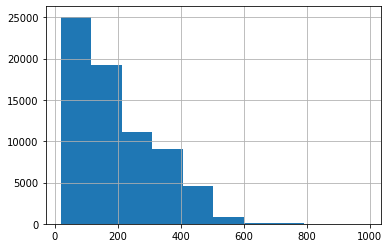

In [10]:
df.num_sold.hist()

In [11]:
df.shape

(70128, 5)

In [12]:
x = df.iloc[:,[0,1,2,3]]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
final = ohe.fit_transform(x.iloc[:,[1,2,3]])
final = pd.DataFrame(final.toarray())
final

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
final['Day'] = pd.DatetimeIndex(df['date']).day
final['Month'] = pd.DatetimeIndex(df['date']).month
final['Year'] = pd.DatetimeIndex(df['date']).year

In [14]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,Day,Month,Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,2017
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,2017
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,2017
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,2017
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,31,12,2020
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,31,12,2020
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,31,12,2020
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31,12,2020


In [15]:
final["time"] = np.arange(len(final.index))

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
y = df.iloc[:,4]

In [19]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,Day,Month,Year,time
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,2017,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,2017,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,2017,2
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,2017,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,31,12,2020,70123
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,31,12,2020,70124
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,31,12,2020,70125
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31,12,2020,70126


In [20]:
model.fit(final,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [21]:
dd = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv")

In [22]:
final2 = pd.DataFrame(ohe.fit_transform(dd.iloc[:,[2,3,4]]).toarray())

In [23]:
final2['Day'] = pd.DatetimeIndex(dd['date']).day
final2['Month'] = pd.DatetimeIndex(dd['date']).month
final2['Year'] = pd.DatetimeIndex(dd['date']).year

In [24]:
final2["time"]=70128+np.arange(len(dd.index))

In [25]:
final2

,0,1,2,3,4,5,6,7,8,9,10,11,Day,Month,Year,time
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,2021,70128
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,2021,70129
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,2021,70130
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,2021,70131
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,2021,70132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,31,12,2021,87643
17516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,31,12,2021,87644
17517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,31,12,2021,87645
17518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31,12,2021,87646


In [26]:
pred = model.predict(final2)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [27]:
pred = [int(p) for p in pred]

In [28]:
ss = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv")
ss

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100
...,...,...
17515,87643,100
17516,87644,100
17517,87645,100
17518,87646,100


In [29]:
submit = pd.DataFrame({"row_id":ss.row_id,"num_sold":pred})

In [30]:
submit.to_csv("Submission.csv",index=False)

In [31]:
submit

,row_id,num_sold
0,70128,396
1,70129,351
2,70130,307
3,70131,413
4,70132,207
...,...,...
17515,87643,345
17516,87644,138
17517,87645,94
17518,87646,49
